# 4 - Evaluation metrics for classification

In [1]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
df = pd.read_csv("data-week3.csv")
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [3]:
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges']
categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'contract', 'paperlessbilling','paymentmethod']

## Setting up validation framework
Splitting data into train/validation/test datasets using `train_test_split` method of `sklearn.model_selection` class.

In [4]:
from sklearn.model_selection import train_test_split

# first split the data into ratio 80:20 for training and test dataset
df_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

# next, split the data X_full and y_full into train, and validation dataset
df_train, df_val = train_test_split(df_full, test_size=0.25, random_state=42)

In [5]:
# Shape
print("df_train shape::", df_train.shape)
print("df_val shape::", df_val.shape)
print("df_test shape::", df_test.shape)

df_train shape:: (4225, 21)
df_val shape:: (1409, 21)
df_test shape:: (1409, 21)


In [6]:
# Reset the index
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

## One-Hot Encoding

In [7]:
# one hot encoding using sklearn.
from sklearn.feature_extraction import DictVectorizer

# Initialize the dictionary vectorizer.
dv = DictVectorizer(sparse=False)

In [8]:
# Convert the data into dictionary object
train_dict = df_train[categorical_cols + numeric_cols].to_dict(orient='records')
val_dict = df_val[categorical_cols + numeric_cols].to_dict(orient='records')
test_dict = df_test[categorical_cols + numeric_cols].to_dict(orient='records')

# fit and transform the data into 0's and 1's
X_transform_train = dv.fit_transform(train_dict)
X_transform_val = dv.transform(val_dict)
X_transform_test = dv.transform(test_dict)

y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

## Training Logistic Regression with Scikit-Learn
We will tarained a model using `LogisticRegression` of `Scikit-learn` library on training data and validate the accuracy of the model using validation dataset.

In [9]:
# Logisitc Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_transform_train, y_train)

# make predictions on validation
y_preds = model.predict_proba(X_transform_val)


# select only probability of 1 or churn.
y_preds = y_preds[:, 1]
print("Accuracy:: ", (y_val == (y_preds>=0.5)).mean())

Accuracy::  0.7998580553584103


## 4.1 Accuracy

Accuracy measures the fraction of total observations that are correctly classified. It is a ratio of the number of total correct classifications to the total number of observations

$$Accuracy = \frac{Total~Correct~Predictions}{Total~Number~of~observations}$$

threshold: 0.00, score: 0.269
threshold: 0.05, score: 0.539
threshold: 0.11, score: 0.625
threshold: 0.16, score: 0.677
threshold: 0.21, score: 0.720
threshold: 0.26, score: 0.748
threshold: 0.32, score: 0.765
threshold: 0.37, score: 0.774
threshold: 0.42, score: 0.788
threshold: 0.47, score: 0.796
threshold: 0.53, score: 0.800
threshold: 0.58, score: 0.793
threshold: 0.63, score: 0.780
threshold: 0.68, score: 0.764
threshold: 0.74, score: 0.749
threshold: 0.79, score: 0.735
threshold: 0.84, score: 0.731
threshold: 0.89, score: 0.731
threshold: 0.95, score: 0.731
threshold: 1.00, score: 0.731


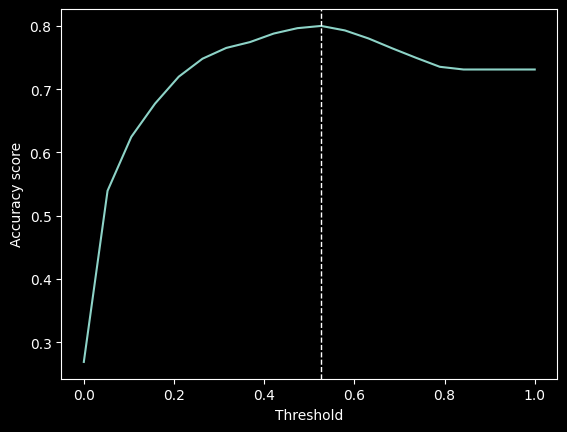

In [10]:
# Measure the predictions for differnt threshold values.

from sklearn.metrics import accuracy_score
thresholds = np.linspace(0, 1, 20)

scores = []
for threshold in thresholds:
    score = accuracy_score(y_val, y_preds >= threshold)
    scores.append(score)
    print("threshold: %.2f, score: %.3f" %(threshold, score))

# plot
plt.plot(thresholds, scores)
plt.axvline(x=thresholds[scores.index(max(scores))], ls='--', lw=1)
plt.xlabel("Threshold")
plt.ylabel("Accuracy score")
plt.show()

## 4.2 Confusion Table

In [35]:
y_preds

array([0.16775449, 0.25650271, 0.4312977 , ..., 0.71915682, 0.0457998 ,
       0.03518162])

In [30]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [36]:
t = 0.5
predicted_postive = (y_preds >= t)
predicted_negative = (y_preds < t)

In [37]:
tp = (actual_positive & predicted_postive).sum()
tn = (actual_negative & predicted_negative).sum()

In [38]:
fp = (actual_negative & predicted_postive).sum()
fn = (actual_positive & predicted_negative).sum()

In [39]:
Confusion_matrix = np.array([
    [tp, fp],
    [fn, tn]
])
Confusion_matrix

array([[203, 106],
       [176, 924]])

## 4.3 Precision and Recall